## Micrograd

In [14]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [11]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label ='d'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

print(a, b)
print(a + b)
print(c)
print(d)
print(d._prev, d._op, d.label)
print(L)

Value(data=2.0, label=a) Value(data=-3.0, label=b)
Value(data=-1.0, label=)
Value(data=10.0, label=c)
Value(data=4.0, label=d)
{Value(data=-6.0, label=e), Value(data=10.0, label=c)} + d
Value(data=-8.0, label=L)


In [13]:
L._prev

{Value(data=-2.0, label=f), Value(data=4.0, label=d)}

### Graph viz

In [7]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


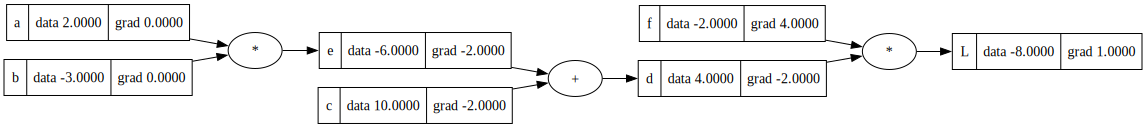

In [30]:
draw_dot(L)

### Derivative/Gradient

In [25]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label ='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label ='d'
    # d = d + Value(h)
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    derivate = ((L2-L1)/h)
    print(f" derivative: {derivate}")

lol()

 derivative: -1.9999999999953388


In [26]:
L.grad = 1.0
d.grad = -2
f.grad = 4

### dL/de = dL/dd * dd/de

In [29]:
c.grad = -2
e.grad = -2

### dL/da = dL/dd * dd/de * de/da
### dL/da = dL/de * de/da

e= a * b

de/da = b

dl/da = -2 * -3 = 6

dl/db = -2 * 2 = -4

In [31]:
a.grad = 6
b.grad = -4

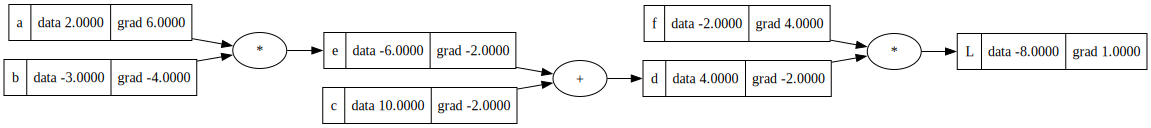

In [32]:
draw_dot(L)